# Nullstellen & Fixpunkte

## Übungsblatt

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Aufgabe 1: Nullstellen einer Funktion


#### a) Darstellung

Wir betrachten folgende Funktion, die Nullstellen bei -1, 3 und 4 hat:

$$ f(x) = x^3 - 6x^2 + 5x + 12 $$

Berechne die Ableitung per Hand und packe diese in die Funktion `fprime`. 

Stelle beide Funktionen `f` und `fprime` im Bereich $x \in [-2,5]$ dar.

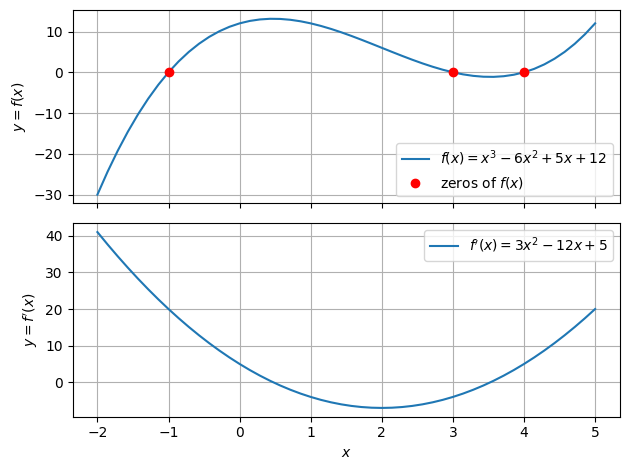

In [2]:
def f(x):
    return x**3 - 6 * x**2 + 5 * x + 12


def fprime(x):
    return 3 * x**2 - 12 * x + 5


x = np.linspace(-2, 5)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, f(x), label="$f(x) = x^3 - 6x^2 + 5x +12$")
ax1.plot([-1, 3, 4], [0, 0, 0], "ro", label="zeros of $f(x)$")
ax1.set_ylabel("$y = f(x)$")
ax1.legend()
ax1.grid()
ax2.plot(x, fprime(x), label="$f'(x) = 3x^2 - 12x + 5$")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$y = f'(x)$")
ax2.legend()
ax2.grid()
plt.tight_layout()
plt.show()


#### b) Nullstellen bestimmen mit SciPy

**1.** Wie man sieht, hat die Funktion 3 Nullstellen in diesem Bereich. Benutze die Funktion [`scipy.optimize.newton`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html), um eine der Nullstellen zu berechnen. Benutze als Startwert $x = 0$. Gebe der SciPy Funktion `f`, den Startwert und `fprime` mit.

In [3]:
from scipy import optimize

optimize.newton(f, 0, fprime)


-1.0

**2.** Die Funktion [`scipy.optimize.newton`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) kann auch mit einem Array aus mehreren Startwerten arbeiten. Ausgehend von jedem dieser Startwerte wird eine Nullstelle gesucht. Probiere es aus, indem Du ein paar Startwerte zusammenpackst.

In [4]:
x0 = np.array([-2, 0, 5])
optimize.newton(f, x0, fprime)


array([-1., -1.,  4.])

#### c) Mehrere Nullstellen mit zufälligen Startwerten finden.

**1.** Nun sollen die Startwerte zufällig ausgewählt werden.

Schreibe eine Funktion, welche für eine gegebene Anzahl Versuche alle Nullstellen einer Funktion finden soll. Die Startwerte sollen innerhalb eines definierten Intervalls liegen und aus diesem zufällig gewählt werden. Die Funktion soll die zufälligen Startwerte und die zugehörigen Nullstellen als Liste von Tupeln zurückliefern.

Verwende für das finden von den Nullstellen die SciPy Funktion [scipy.optimize.newton](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html).

Funktion `root_finding(f, frpime, low, high, steps, seed=1)`:

- `f`: Funktion, deren Nullstellen gesucht werden sollen
- `fprime`: Die Ableitung von `f`
- `low`: untere Intervallsgrenze
- `high`: obere Intervallsgrenze
- `steps`: Anzahl Versuche, Nullstellen zu finden
- `seed=1`: Seed des Zufallszahlengenerators mit Default 1

Für vergleichbare Ergebnisse setzen wir den Seed von [np.random.default_rng](https://numpy.org/doc/stable/reference/random/generator.html) auf 1.

In [5]:
def root_finding(f, fprime, low, high, steps, seed=1):
    rng = np.random.default_rng(seed)
    x0 = rng.uniform(low, high, size=steps)
    x = optimize.newton(f, x0, fprime)
    return list(zip(x0, x))


**2.** Teste `root_finding` mit der Funktion $f(x)$ und 3 Startwerten im Intervall $[-2, 5]$.

Du solltest die Nullstellen 3, 4 und -1 finden.

In [6]:
root_finding(f, fprime, -2, 5, 3)


[(1.582751372901797, 3.0000000000000004),
 (4.653245874281547, 4.0),
 (-0.990882710962564, -1.0)]

Wenn du wesentlich mehr Startwerte erzeugst, findest Du natürlich immer wieder die gleichen Nullstellen. Teste dies mit `steps=25` oder mehr.

In [7]:
root_finding(f, fprime, -2, 5, 25)


[(1.582751372901797, 3.0000000000000004),
 (4.653245874281547, 4.0),
 (-0.990882710962564, -1.0),
 (4.640546129960707, 4.0),
 (0.18282016407339796, -1.0),
 (0.9632851428080293, 4.0),
 (3.793918156743092, 4.0),
 (0.8643939545841288, 4.0),
 (1.8471558137114164, 3.000000000000001),
 (-1.8070862072985214, -1.0),
 (3.274591760723646, 2.999999999999998),
 (1.7670031925349474, 2.9999999999999982),
 (0.30812201549364504, -1.0),
 (3.5190009239988305, -1.0),
 (0.12236380504151478, -1.0),
 (1.1744852263645607, 3.0000000000000004),
 (-1.0617081192698468, -1.0),
 (0.8217909051299044, 4.0),
 (-0.5758133152669527, -1.0),
 (-0.16380661690705356, -1.0),
 (3.2525527084103683, 2.999999999999998),
 (-0.037138694097720526, -1.0),
 (1.3963368210214453, 3.0),
 (4.865160398608671, 4.0),
 (4.731600355646507, 4.0)]

#### d) Nur unterschiedliche Nullstellen finden

**1.** Ändere `root_finding` so ab, dass nur die unterschiedlichen Nullstellen zurückgegeben werden.

- Nenne die neue Funktion `root_finding_unique`.
- Die Funktion soll nur noch die Nullstellen als Array liefern und nicht mehr die Startwerte.
- Es sollten jetzt keine doppelten Einträge mehr vorkommen.

Die Funktion [`np.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) kann dir hier helfen.


In [8]:
def root_finding_unique(f, fprime, low, high, steps, seed=1):
    rng = np.random.default_rng(seed)
    x0 = rng.uniform(low, high, size=steps)
    x = optimize.newton(f, x0, fprime)
    return np.unique(x)


**2.** Teste `root_finding` mit der Funktion $f(x)$ und zuerst 5 und dann 25 Startwerten im Intervall $[-2, 5]$.

In [9]:
root_finding_unique(f, fprime, -2, 5, 5)


array([-1.,  3.,  4.])

In [10]:
for x in root_finding_unique(f, fprime, -2, 5, 25):
    print(x)


-1.0
2.999999999999998
2.9999999999999982
3.0
3.0000000000000004
3.000000000000001
4.0


Warum haben wir im Fall `steps=25` trotzdem am Ende noch fünf mal die 3 in der Lösung?

#### e) Nullstellen darstelen

Plotte die gefunden Nullstellen als rote Punkte in den ursprünglichen Graphen.

NameError: name 'zeros' is not defined

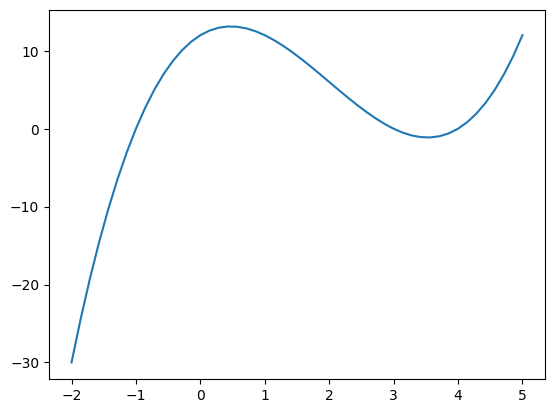

In [11]:
x = np.linspace(-2, 5)
plt.plot(x, f(x), label="f(x)")
plt.plot(zeros, np.zeros_like(zeros), "or", label="zeros")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()


### Aufgabe 2: Nullstellen von Daten


#### a) Daten importieren

In der Datei `DavosTemperatur.txt` sind Daten in drei Spalten zu finden. Die erste Spalte gibt das Kürzel der Wetterstation an, die zweite zeigt eine Zahl welche aus dem Datum und der Stunde besteht. Die dritte Spalte gibt die gemessene Temperatur wieder.

- Importiere die dritte Spalte der Datei `DavosTemperatur.txt` in ein Array namens `temperature`.
- Gib den Shape des Arrays und die ersten 5 Elemente aus.

In [ ]:
temperature = np.loadtxt("DavosTemperatur.txt", delimiter=";", usecols=2, skiprows=1)
print(temperature.shape)
print(temperature[:5])


#### b) Daten dartsellen

- Stelle die Temperaturen grafisch dar.
- Beschrifte die Achsen und gib dem Plot einen aussagekräftigen Titel.
- Schränke den Bereich der x-Achse (Zeit) auf die ersten 48 Stunden ein. Benutze datu die Funktion [`plt.xlim`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html).


In [ ]:
hours = range(0, 48)
plt.plot(hours, temperature)
plt.xlabel("Messzeitpunkt [h]")
plt.ylabel("Temperatur [°C]")
plt.title("Temperatur in Davos")
plt.xlim(0, 47)
plt.grid()
plt.show()


#### c) Interpolation der Daten

- Die Temperaturwerte sollen im Bereich $x \in [0, 47]$ an 500 Punkten interpoliert werden.
- Stelle die interpolierten Daten grafisch dar.

Tipp: Folgende Funktionen kannst du für diese Aufgabe benutzen:

- [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
- [`scipy.interpolate.interp1d`](https://docs.scipy.org/doc/scipy/reference/interpolate.html)


In [ ]:
from scipy import interpolate

n = 500
t_inter = np.linspace(0, 47, n)
predict = interpolate.interp1d(hours, temperature, kind="cubic", fill_value="extrapolate")
T_inter = predict(t_inter)


plt.plot(t_inter, T_inter)
plt.xlabel("Messzeitpunkt [h]")
plt.ylabel("Temperatur [°C]")
plt.title("Temperatur in Davos - interpoliert")
plt.xlim(0, 47)
plt.grid()
plt.show()


#### d) Nullstellen bestimmen

Aus dem erzeugten Graph wird sichtbar, dass es 4 Nullstellen gibt.

- Finde alle vier Nullstellen.
- Schätze dazu von Auge gute Startwerte bzw. Startintervalle.

Tipp: Folgende Funktionen kannst du für diese Aufgabe benutzen:

- [`scipy.optimize.bisect`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)
- [`scipy.optimize.newton`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html). Diese kann auch verwendet werden, wenn die Ableitung `fprime` nicht bekannt ist. In diesem Fall wird die Sekantenmethode verwendet, eine leicht angepasste Variante des Newton-Verfahrens, bei dem die Ableitung auch numerisch bestimmt wird.

In [ ]:
# NST finden

zero1 = optimize.bisect(predict, 9, 12)
zero2 = optimize.bisect(predict, 15, 18)
zero3 = optimize.newton(predict, 33)
zero4 = optimize.newton(predict, 41)
print(f"Die vier Nullstellen befinden sich bei, {zero1}, {zero2}, {zero3} und {zero4}")


#### e) Nullstellen darstellen

- Plotte die Nullstellen in den Graphen mit den interpolierten Daten.
- Stelle die Nullstellen als rote Punkte dar.

In [ ]:
plt.plot(t_inter, T_inter, label="interpolierte Daten")
plt.plot([zero1, zero2, zero3, zero4], [0, 0, 0, 0], "or", label="Nullstellen")
plt.xlabel("Messzeitpunkt [h]")
plt.ylabel("Temperatur [°C]")
plt.title("Temperatur Davos Interpoliert")
plt.xlim(0, 47)
plt.grid()
plt.show()
